In [1]:
nombre = "\n Ricardo Madrigal Urencio \n"
print(nombre)


 Ricardo Madrigal Urencio 



In [2]:
#Todas las librerias a Importar
from pyspark.sql.functions import col, sum, to_date, to_timestamp, regexp_replace
from pyspark.sql.functions import date_format
from pyspark.sql.types import IntegerType, DoubleType, FloatType
from pyspark.sql.functions import hour, minute, second, year, month, dayofmonth, weekofyear
from pyspark.sql.functions import monotonically_increasing_id
import matplotlib.pyplot as plt

In [3]:
#Crear un solo Dataframe con todos los meses

In [4]:
dir_hdfs = "hdfs://namenode:9000/tmp/amd/ecobici/2019"

print(nombre)

df = spark.read.csv(dir_hdfs, header=True, inferSchema=True)
df.printSchema()


 Ricardo Madrigal Urencio 

root
 |-- Genero_Usuario: string (nullable = true)
 |-- Edad_Usuario: string (nullable = true)
 |-- Bici: string (nullable = true)
 |-- Ciclo_Estacion_Retiro: string (nullable = true)
 |-- Fecha_Retiro: string (nullable = true)
 |-- Hora_Retiro: string (nullable = true)
 |-- Ciclo_Estacion_Arribo: string (nullable = true)
 |-- Fecha_Arribo: string (nullable = true)
 |-- Hora_Arribo: string (nullable = true)
 |-- _c9: timestamp (nullable = true)



In [5]:
print(nombre)

print(df.count())


 Ricardo Madrigal Urencio 

8415445


In [6]:
print(nombre)

df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()


 Ricardo Madrigal Urencio 

+--------------+------------+----+---------------------+------------+-----------+---------------------+------------+-----------+-------+
|Genero_Usuario|Edad_Usuario|Bici|Ciclo_Estacion_Retiro|Fecha_Retiro|Hora_Retiro|Ciclo_Estacion_Arribo|Fecha_Arribo|Hora_Arribo|    _c9|
+--------------+------------+----+---------------------+------------+-----------+---------------------+------------+-----------+-------+
|             0|           0|   0|                    0|           0|          0|                    0|           0|          0|8415444|
+--------------+------------+----+---------------------+------------+-----------+---------------------+------------+-----------+-------+



In [7]:
print(nombre)

df.filter("_c9 is not null").show(truncate = False)


 Ricardo Madrigal Urencio 

+--------------+------------+----+---------------------+------------+-----------+---------------------+------------+-----------+-------------------+
|Genero_Usuario|Edad_Usuario|Bici|Ciclo_Estacion_Retiro|Fecha_Retiro|Hora_Retiro|Ciclo_Estacion_Arribo|Fecha_Arribo|Hora_Arribo|_c9                |
+--------------+------------+----+---------------------+------------+-----------+---------------------+------------+-----------+-------------------+
|M             |44          |9944|267                  |06/03/2019  |08:06:23   |32:11.8              |10          |00:00:00   |2024-10-21 08:41:11|
+--------------+------------+----+---------------------+------------+-----------+---------------------+------------+-----------+-------------------+



In [8]:
#Eliminar Registros Inválidos

print (nombre)
print(df.count())


df = df.filter("_c9 is null")
df = df.filter(col("Fecha_Retiro").like('%2019'))

print(df.count())


 Ricardo Madrigal Urencio 

8415445
8415401


In [9]:
print(nombre)

df.orderBy("Fecha_Arribo", ascending = True).show(10, truncate = False)


 Ricardo Madrigal Urencio 

+--------------+------------+-----+---------------------+------------+-----------+---------------------+------------+-----------+----+
|Genero_Usuario|Edad_Usuario|Bici |Ciclo_Estacion_Retiro|Fecha_Retiro|Hora_Retiro|Ciclo_Estacion_Arribo|Fecha_Arribo|Hora_Arribo|_c9 |
+--------------+------------+-----+---------------------+------------+-----------+---------------------+------------+-----------+----+
|M             |36          |11444|67                   |01/01/2019  |0:08:44    |36                   |01/01/2019  |0:14:03    |NULL|
|M             |36          |9196 |55                   |01/01/2019  |0:12:05    |136                  |01/01/2019  |0:42:11    |NULL|
|M             |38          |2612 |29                   |01/01/2019  |0:13:15    |115                  |01/01/2019  |0:37:47    |NULL|
|M             |43          |7463 |29                   |01/01/2019  |0:13:36    |115                  |01/01/2019  |0:38:04    |NULL|
|M             |37        

In [10]:
#Limpieza del esquema
print(nombre)

datos = df\
.withColumn("Edad_Usuario", col("Edad_Usuario").cast(FloatType())) \
.withColumn("Bici", col("Bici").cast(IntegerType())) \
.withColumn("Ciclo_Estacion_Retiro", col("Ciclo_Estacion_Retiro").cast(IntegerType())) \
.withColumn("Fecha_Retiro", to_date(col("Fecha_Retiro"), "dd/MM/yyyy")) \
.withColumn("Hora_Retiro", date_format(col("Hora_Retiro"), "HH:mm:ss")) \
.withColumn("Ciclo_Estacion_Arribo", col("Ciclo_Estacion_Arribo").cast(IntegerType())) \
.withColumn("Fecha_Arribo", to_date(col("Fecha_Arribo"), "dd/MM/yyyy")) \
.withColumn("Hora_Arribo", date_format(col("Hora_Arribo"), "HH:mm:ss"))\
.withColumn( "id", monotonically_increasing_id().cast(IntegerType()))
datos.printSchema()
datos.orderBy("Fecha_Arribo", ascending = True).show(10, truncate = False)


 Ricardo Madrigal Urencio 

root
 |-- Genero_Usuario: string (nullable = true)
 |-- Edad_Usuario: float (nullable = true)
 |-- Bici: integer (nullable = true)
 |-- Ciclo_Estacion_Retiro: integer (nullable = true)
 |-- Fecha_Retiro: date (nullable = true)
 |-- Hora_Retiro: string (nullable = true)
 |-- Ciclo_Estacion_Arribo: integer (nullable = true)
 |-- Fecha_Arribo: date (nullable = true)
 |-- Hora_Arribo: string (nullable = true)
 |-- _c9: timestamp (nullable = true)
 |-- id: integer (nullable = false)

+--------------+------------+-----+---------------------+------------+-----------+---------------------+------------+-----------+----+---+
|Genero_Usuario|Edad_Usuario|Bici |Ciclo_Estacion_Retiro|Fecha_Retiro|Hora_Retiro|Ciclo_Estacion_Arribo|Fecha_Arribo|Hora_Arribo|_c9 |id |
+--------------+------------+-----+---------------------+------------+-----------+---------------------+------------+-----------+----+---+
|M             |36.0        |11444|67                   |2019-01-01  |

In [11]:
#Agregar campos año, mes, día, hora, minuto, segundo, día de la semana

In [12]:
#Separar Fechas y Horas de Retiro en Campos Individuales

from pyspark.sql.functions import hour, minute, second, year, month, dayofmonth, weekofyear
colfs = "Fecha_Retiro"
colhs = "Hora_Retiro"

datos_tiempo_retiro = datos.select(
    col("id"), col("Genero_Usuario"), col("Edad_Usuario"), col("Bici"), col("Ciclo_Estacion_Retiro"),col("Fecha_Retiro"),
    date_format(col(colfs), "EEEE").alias("dia_sem_retiro"),
    dayofmonth(col(colfs)).alias("num_dia_retiro"),
    month(col(colfs)).alias("num_mes_retiro"),
    date_format(col(colfs), "MMMM").alias("mes_retiro"),
    year(col(colfs)).alias("anio_retiro"),
    col("Hora_Retiro"),
    hour(col(colhs)).alias("num_hora_retiro"),
    minute(col(colhs)).alias("minuto_retiro"),    
    second(col(colhs)).alias("segundo_retiro")
    
)

print(nombre)

datos_tiempo_retiro.printSchema()

datos_tiempo_retiro.orderBy('anio_retiro', ascending = True).show(5)


 Ricardo Madrigal Urencio 

root
 |-- id: integer (nullable = false)
 |-- Genero_Usuario: string (nullable = true)
 |-- Edad_Usuario: float (nullable = true)
 |-- Bici: integer (nullable = true)
 |-- Ciclo_Estacion_Retiro: integer (nullable = true)
 |-- Fecha_Retiro: date (nullable = true)
 |-- dia_sem_retiro: string (nullable = true)
 |-- num_dia_retiro: integer (nullable = true)
 |-- num_mes_retiro: integer (nullable = true)
 |-- mes_retiro: string (nullable = true)
 |-- anio_retiro: integer (nullable = true)
 |-- Hora_Retiro: string (nullable = true)
 |-- num_hora_retiro: integer (nullable = true)
 |-- minuto_retiro: integer (nullable = true)
 |-- segundo_retiro: integer (nullable = true)

+---+--------------+------------+-----+---------------------+------------+--------------+--------------+--------------+----------+-----------+-----------+---------------+-------------+--------------+
| id|Genero_Usuario|Edad_Usuario| Bici|Ciclo_Estacion_Retiro|Fecha_Retiro|dia_sem_retiro|num_dia_

In [13]:
#Separar Fechas y Horas de Arribo en Campos Individuales

from pyspark.sql.functions import hour, minute, second, year, month, dayofmonth, weekofyear
colfs = "Fecha_Arribo"
colhs = "Hora_Arribo"

datos_tiempo_arribo = datos.select(
   col("id"), col("Genero_Usuario"), col("Edad_Usuario"), col("Bici"), col("Ciclo_Estacion_Arribo"), col("Fecha_Arribo"),
    date_format(col(colfs), "EEEE").alias("dia_sem_arribo"),
    dayofmonth(col(colfs)).alias("num_dia_arribo"),
    month(col(colfs)).alias("num_mes_arribo"),
    date_format(col(colfs), "MMMM").alias("mes_arribo"),
    year(col(colfs)).alias("anio_arribo"),
    col("Hora_Arribo"),
    hour(col(colhs)).alias("num_hora_arribo"),
    minute(col(colhs)).alias("minuto_arribo"),    
    second(col(colhs)).alias("segundo_arribo")
)

print(nombre)

datos_tiempo_arribo.printSchema()

datos_tiempo_arribo.orderBy('Fecha_Arribo', ascending = True).show(5)


 Ricardo Madrigal Urencio 

root
 |-- id: integer (nullable = false)
 |-- Genero_Usuario: string (nullable = true)
 |-- Edad_Usuario: float (nullable = true)
 |-- Bici: integer (nullable = true)
 |-- Ciclo_Estacion_Arribo: integer (nullable = true)
 |-- Fecha_Arribo: date (nullable = true)
 |-- dia_sem_arribo: string (nullable = true)
 |-- num_dia_arribo: integer (nullable = true)
 |-- num_mes_arribo: integer (nullable = true)
 |-- mes_arribo: string (nullable = true)
 |-- anio_arribo: integer (nullable = true)
 |-- Hora_Arribo: string (nullable = true)
 |-- num_hora_arribo: integer (nullable = true)
 |-- minuto_arribo: integer (nullable = true)
 |-- segundo_arribo: integer (nullable = true)

+---+--------------+------------+-----+---------------------+------------+--------------+--------------+--------------+----------+-----------+-----------+---------------+-------------+--------------+
| id|Genero_Usuario|Edad_Usuario| Bici|Ciclo_Estacion_Arribo|Fecha_Arribo|dia_sem_arribo|num_dia_

In [14]:
#Mostrar las estadísticas descriptivas

In [15]:
#Estadisticos Descriptivos de algunas columnas de cada DataFrame
print(nombre)

print("Estadisticas Descriptivas de Retiros")
columnas = ["Genero_Usuario", "Edad_Usuario", "Bici", "Ciclo_Estacion_Retiro", "num_mes_retiro", "num_hora_retiro", "anio_retiro", "id"]
datos_tiempo_retiro.select(columnas).describe().show()

print("Estadisticas Descriptivas de Arribos")
columnas = ["Genero_Usuario", "Edad_Usuario", "Bici", "Ciclo_Estacion_Arribo", "num_mes_arribo", "num_hora_arribo", "anio_arribo", "id"]
datos_tiempo_arribo.select(columnas).describe().show()

## Debido a Limitantes con mi equipo, tuve que reducir las columnas que hacen las estadísticas descriptivas ya que
## se quedaba colgada con una carga de 100% de CPU y no entregaba ninguna salida. 
## (Lo dejé 10 minutos y no hizo nada, al reducirlas lo hizo en 2 mnutos).


 Ricardo Madrigal Urencio 

Estadisticas Descriptivas de Retiros
+-------+--------------+------------------+-----------------+---------------------+------------------+------------------+-----------+-----------------+
|summary|Genero_Usuario|      Edad_Usuario|             Bici|Ciclo_Estacion_Retiro|    num_mes_retiro|   num_hora_retiro|anio_retiro|               id|
+-------+--------------+------------------+-----------------+---------------------+------------------+------------------+-----------+-----------------+
|  count|       8415401|           8415401|          8415139|              8415401|           8415401|           8415400|    8415401|          8415401|
|   mean|          NULL| 35.15934760565777|9051.881213132665|   185.12785795947215| 6.421949589805643|13.810443948000096|     2019.0| 352060.152648935|
| stddev|          NULL|10.355814621552764|2891.710178603115|     133.226348084314|3.3979114278095155| 4.668522623491424|        0.0|204764.1972095205|
|    min|             

In [16]:
#Guardar el nuevo dataframe

In [17]:
#Guardar el Dataframe en dos partes para hacer uniones posteriormente

print(nombre)

datos_tiempo_retiro.write.mode("overwrite").option("header", "true").csv("hdfs://namenode:9000/tmp/amd/ecobiciretiros")
print("Done")

datos_tiempo_arribo.write.mode("overwrite").option("header", "true").csv("hdfs://namenode:9000/tmp/amd/ecobiciarribos")
print("Done")


 Ricardo Madrigal Urencio 

Done
Done


In [18]:
#Crear Vista Temporal de los dataframes guardados

In [19]:
#Datos de Retiros

dir_hdfs = "hdfs://namenode:9000/tmp/amd/ecobiciretiros"

dfret = spark.read.csv(dir_hdfs, header = True, inferSchema = True)

print(nombre)
dfret.printSchema()


 Ricardo Madrigal Urencio 

root
 |-- id: integer (nullable = true)
 |-- Genero_Usuario: string (nullable = true)
 |-- Edad_Usuario: double (nullable = true)
 |-- Bici: integer (nullable = true)
 |-- Ciclo_Estacion_Retiro: integer (nullable = true)
 |-- Fecha_Retiro: date (nullable = true)
 |-- dia_sem_retiro: string (nullable = true)
 |-- num_dia_retiro: integer (nullable = true)
 |-- num_mes_retiro: integer (nullable = true)
 |-- mes_retiro: string (nullable = true)
 |-- anio_retiro: integer (nullable = true)
 |-- Hora_Retiro: timestamp (nullable = true)
 |-- num_hora_retiro: integer (nullable = true)
 |-- minuto_retiro: integer (nullable = true)
 |-- segundo_retiro: integer (nullable = true)



In [20]:
#Datos de Arribos

dir_hdfs = "hdfs://namenode:9000/tmp/amd/ecobiciarribos"

dfarr = spark.read.csv(dir_hdfs, header = True, inferSchema = True)

print(nombre)
dfarr.printSchema()


 Ricardo Madrigal Urencio 

root
 |-- id: integer (nullable = true)
 |-- Genero_Usuario: string (nullable = true)
 |-- Edad_Usuario: double (nullable = true)
 |-- Bici: integer (nullable = true)
 |-- Ciclo_Estacion_Arribo: integer (nullable = true)
 |-- Fecha_Arribo: date (nullable = true)
 |-- dia_sem_arribo: string (nullable = true)
 |-- num_dia_arribo: integer (nullable = true)
 |-- num_mes_arribo: integer (nullable = true)
 |-- mes_arribo: string (nullable = true)
 |-- anio_arribo: integer (nullable = true)
 |-- Hora_Arribo: timestamp (nullable = true)
 |-- num_hora_arribo: integer (nullable = true)
 |-- minuto_arribo: integer (nullable = true)
 |-- segundo_arribo: integer (nullable = true)



In [21]:
#Vistas Temporales

spark.sql("show tables").show()

dfret.createOrReplaceTempView("ecobiciretiros")
dfarr.createOrReplaceTempView("ecobiciarribos")
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
+---------+---------+-----------+

+---------+--------------+-----------+
|namespace|     tableName|isTemporary|
+---------+--------------+-----------+
|         |ecobiciarribos|       true|
|         |ecobiciretiros|       true|
+---------+--------------+-----------+



In [22]:
#Describir Tablas de las Vistas Temporales

print(nombre)

print("Ecobici Retiros")
spark.sql("describe ecobiciretiros").show()

print("Ecobici Arribos")
spark.sql("describe ecobiciarribos").show()


 Ricardo Madrigal Urencio 

Ecobici Retiros
+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|                  id|      int|   NULL|
|      Genero_Usuario|   string|   NULL|
|        Edad_Usuario|   double|   NULL|
|                Bici|      int|   NULL|
|Ciclo_Estacion_Re...|      int|   NULL|
|        Fecha_Retiro|     date|   NULL|
|      dia_sem_retiro|   string|   NULL|
|      num_dia_retiro|      int|   NULL|
|      num_mes_retiro|      int|   NULL|
|          mes_retiro|   string|   NULL|
|         anio_retiro|      int|   NULL|
|         Hora_Retiro|timestamp|   NULL|
|     num_hora_retiro|      int|   NULL|
|       minuto_retiro|      int|   NULL|
|      segundo_retiro|      int|   NULL|
+--------------------+---------+-------+

Ecobici Arribos
+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|                  id|      int|   N

In [23]:
#Mostar las 10 estaciones con mayores viajes de inicio

campo = "Ciclo_Estacion_Retiro"

print(nombre)

sqlstr = f"""select {campo} estacion_inicio, count(*) viajes_realizados
from ecobiciretiros
group by {campo} 
order by viajes_realizados desc
"""
spark.sql(sqlstr).show(10, truncate=False)


 Ricardo Madrigal Urencio 

+---------------+-----------------+
|estacion_inicio|viajes_realizados|
+---------------+-----------------+
|271            |88244            |
|27             |76738            |
|1              |73328            |
|182            |56477            |
|64             |55994            |
|266            |54057            |
|36             |53926            |
|18             |53891            |
|41             |51605            |
|43             |49942            |
+---------------+-----------------+
only showing top 10 rows



In [24]:
#Mostrar las 5 horas con mayor demanda

campo = "num_hora_retiro"
campo2 = "num_hora_arribo"

print(nombre)

print("Mayor Demanda de Retiros")
sqlstr = f"""select {campo}, count(*) viajes_realizados
from ecobiciretiros
group by {campo}
order by viajes_realizados desc
"""
spark.sql(sqlstr).show(5, truncate=False)

print("Mayor Demanda de Arribos")
sqlstr = f"""select {campo2}, count(*) viajes_realizados
from ecobiciarribos
group by {campo2}
order by viajes_realizados desc
"""
spark.sql(sqlstr).show(5, truncate=False)


 Ricardo Madrigal Urencio 

Mayor Demanda de Retiros
+---------------+-----------------+
|num_hora_retiro|viajes_realizados|
+---------------+-----------------+
|8              |844562           |
|18             |839403           |
|19             |646418           |
|9              |630415           |
|17             |609472           |
+---------------+-----------------+
only showing top 5 rows

Mayor Demanda de Arribos
+---------------+-----------------+
|num_hora_arribo|viajes_realizados|
+---------------+-----------------+
|18             |803437           |
|8              |773917           |
|9              |723906           |
|19             |712463           |
|14             |570422           |
+---------------+-----------------+
only showing top 5 rows



In [25]:
#Mostrar el día de la semana con menor demanda
campo = "dia_sem_retiro"
campo2 = "dia_sem_arribo"


print(nombre)

print("Dia con Menor Demanda de Retiros")
sqlstr = f"""select {campo}, count(*) viajes_realizados
from ecobiciretiros
group by {campo}
order by viajes_realizados asc
"""
spark.sql(sqlstr).show(1, truncate=False)

print("Dia con Menor Demanda de Arribos")
sqlstr = f"""select {campo2}, count(*) viajes_realizados
from ecobiciarribos
group by {campo2}
order by viajes_realizados asc
"""
spark.sql(sqlstr).show(1, truncate=False)


 Ricardo Madrigal Urencio 

Dia con Menor Demanda de Retiros
+--------------+-----------------+
|dia_sem_retiro|viajes_realizados|
+--------------+-----------------+
|Sunday        |542492           |
+--------------+-----------------+
only showing top 1 row

Dia con Menor Demanda de Arribos
+--------------+-----------------+
|dia_sem_arribo|viajes_realizados|
+--------------+-----------------+
|Sunday        |543412           |
+--------------+-----------------+
only showing top 1 row



In [26]:
#Genearar 5 Gráficas


 Ricardo Madrigal Urencio 

En esta gráfica podemos ver la demanda por mes ordenada del mes con mayor demanda al mes con menor demanda.



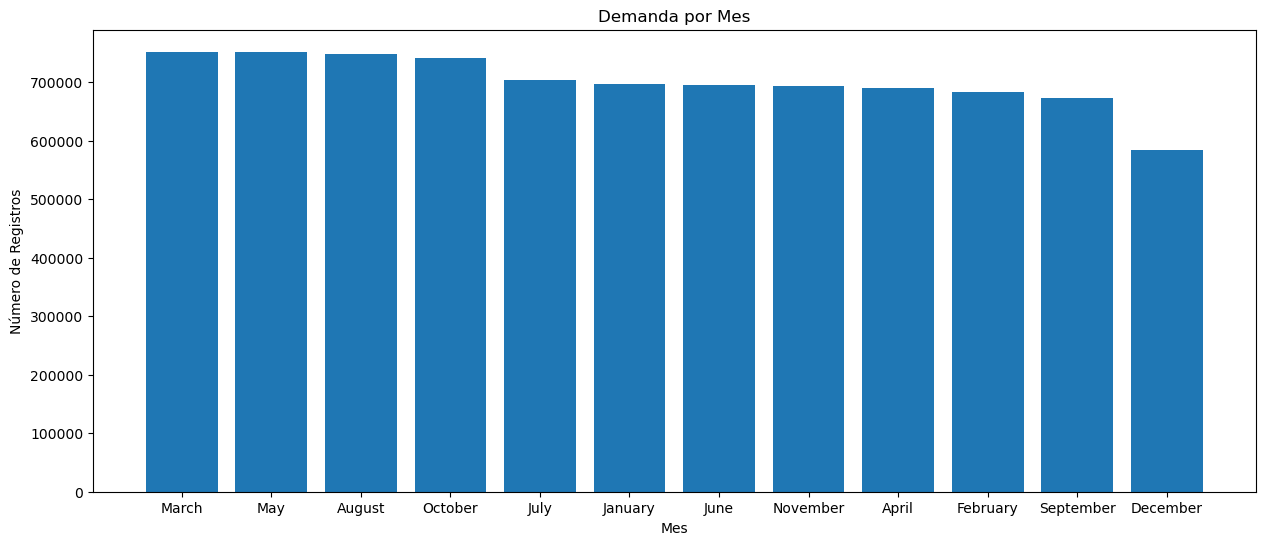

In [27]:
#Gráfica de demanda por mes
campo = "mes_retiro"

sqlstr = f"""select {campo}, count(*) viajes_realizados
from ecobiciretiros
group by {campo}
order by viajes_realizados desc
"""

print(nombre)
dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(15,6))
plt.bar(dfh['mes_retiro'], dfh['viajes_realizados'])

plt.xlabel('Mes')
plt.ylabel('Número de Registros')
plt.title('Demanda por Mes')

print("En esta gráfica podemos ver la demanda por mes ordenada del mes con mayor demanda al mes con menor demanda.\n")


 Ricardo Madrigal Urencio 

En esta gráfica podemos observar que la hora con mayor demanda a lo largo del año fue entre las 8:00 am y las 9:00 am.

Mientras que las horas sin demnada ocurrieron entre la 1:00 am y las 4:00 am.



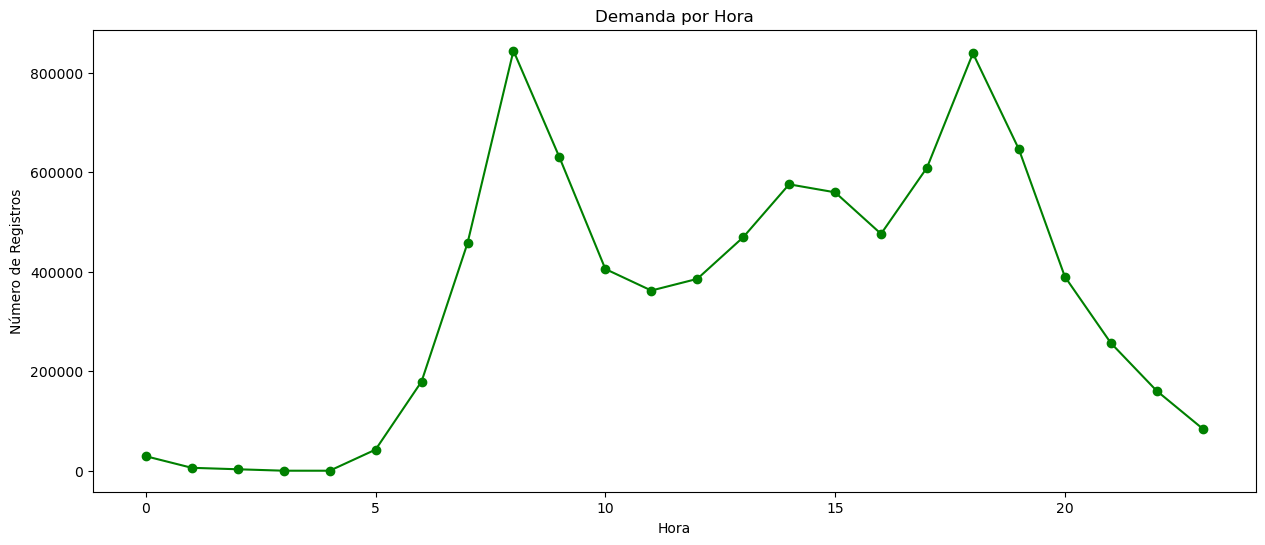

In [28]:
#Gráfica de demanda por hora
campo = "num_hora_retiro"

sqlstr = f"""select {campo} hora, count(*) viajes_realizados
from ecobiciretiros
group by  hora
order by 1
"""

print(nombre)
dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(15,6))
plt.plot(dfh['hora'], dfh['viajes_realizados'], marker='o', linestyle='-', color='g')

plt.xlabel('Hora')
plt.ylabel('Número de Registros')
plt.title('Demanda por Hora')

print("En esta gráfica podemos observar que la hora con mayor demanda a lo largo del año fue entre las 8:00 am y las 9:00 am.\n")
print("Mientras que las horas sin demnada ocurrieron entre la 1:00 am y las 4:00 am.\n")


 Ricardo Madrigal Urencio 

+--------+-----------------+
|estacion|viajes_realizados|
+--------+-----------------+
|     266|            91120|
|      27|            77773|
|       1|            76642|
|     271|            65080|
|     182|            60782|
+--------+-----------------+
only showing top 5 rows

En esta grafica se observa que las estaciones 266, 27, 1, 271 y 64 son las que recibieron la mayor cantidad de bicicletas a lo largo del año.



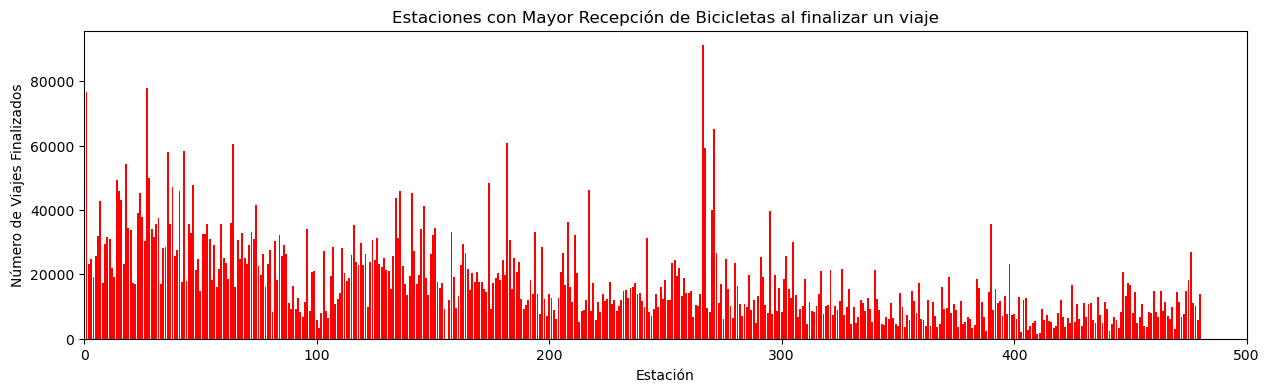

In [29]:
#Estaciones que Reciben mayor cantidad de Bicicletas
campo = "Ciclo_Estacion_Arribo"

sqlstr = f"""select {campo} estacion, count(*) viajes_realizados
from ecobiciarribos
group by  estacion
order by 2 desc
"""

print(nombre)
spark.sql(sqlstr).show(5)
dfh = spark.sql(sqlstr).toPandas()

plt.figure(figsize=(15,4))
plt.bar(dfh['estacion'], dfh['viajes_realizados'], color='r')
plt.xlim(0, 500)

plt.xlabel('Estación')
plt.ylabel('Número de Viajes Finalizados')
plt.title('Estaciones con Mayor Recepción de Bicicletas al finalizar un viaje')

print("En esta grafica se observa que las estaciones 266, 27, 1, 271 y 64 son las que recibieron la mayor cantidad de bicicletas a lo largo del año.\n")


 Ricardo Madrigal Urencio 



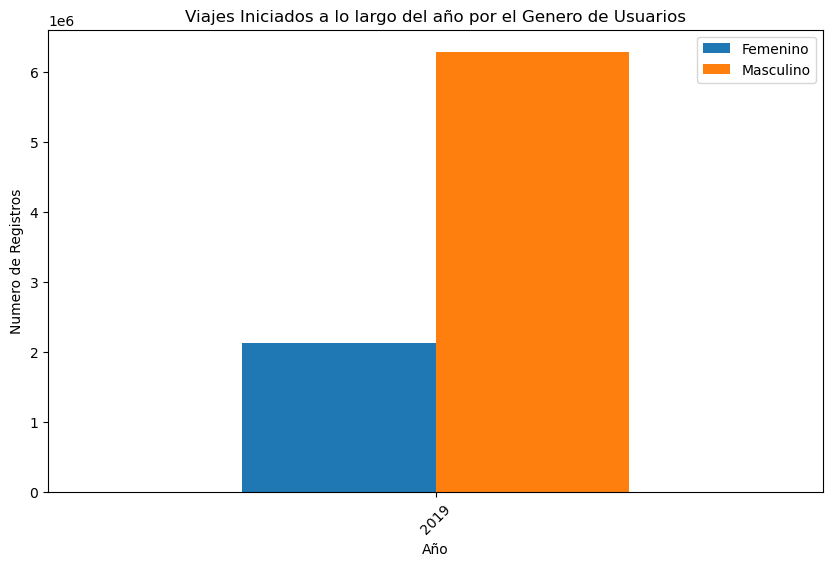

En esta grafica se puede observar como los hombres utilizan casi el triple las bicicletas que las mujeres.



In [30]:
#Genero de Usuarios a lo largo del año

sqlstr = f"""
select anio_retiro,
       sum(case when Genero_Usuario = 'F' then nr else 0 end) as Femenino,
       sum(case when Genero_Usuario = 'M' then nr else 0 end) as Masculino
from (
    select Genero_Usuario, anio_retiro, count(*) as nr
    from ecobiciretiros
    group by Genero_Usuario, anio_retiro
) as d
group by anio_retiro
order by 1;
"""
print(nombre)
dfh = spark.sql(sqlstr).toPandas()\
    .set_index('anio_retiro')[['Femenino', 'Masculino']]\
    .plot(kind='bar', stacked=False, figsize=(10,6))

plt.xlabel('Año')
plt.ylabel('Numero de Registros')
plt.title('Viajes Iniciados a lo largo del año por el Genero de Usuarios') 
plt.xticks(rotation=45)

plt.show()

print("En esta grafica se puede observar como los hombres utilizan casi el triple las bicicletas que las mujeres.\n")

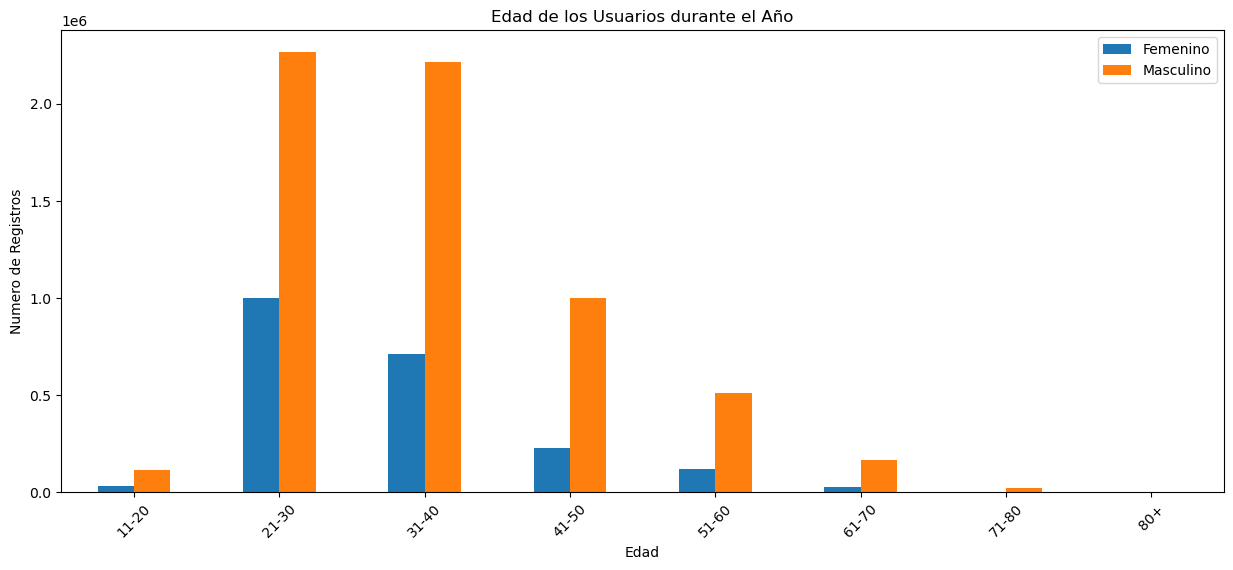

En esta gráfica podemos observar como la mayoría de los usuarios tienen entre 21 y 40 años y son hombres.

Mientras que las mujeres que más usan el servicio tienen entre 21 y 30 años.

También se puede observar que hay usuarios de la tercera edad, principalmente hombres.



In [31]:
#Edad de los Usuarios a lo Largo del Año
sqlstr = f"""
select
  anio_retiro,
  rango_edad,
  sum(CASE WHEN Genero_Usuario = 'F' then num_usuarios ELSE 0 END) as Femenino,
  sum(CASE WHEN Genero_Usuario = 'M' then num_usuarios ELSE 0 END) as Masculino
from
  (
    select
      anio_retiro,
      Genero_Usuario,
      case
        when Edad_Usuario between 11 and 20 then '11-20'
        when Edad_Usuario between 21 and 30 then '21-30'
        when Edad_Usuario between 31 and 40 then '31-40'
        when Edad_Usuario between 41 and 50 then '41-50'
        when Edad_Usuario between 51 and 60 then '51-60'
        when Edad_Usuario between 61 and 70 then '61-70'
        when Edad_Usuario between 71 and 80 then '71-80'
        else '80+'
      end as rango_edad,
      count(*) as num_usuarios
    from
      ecobiciretiros
    where Genero_Usuario IS NOT NULL
    group by
      anio_retiro,
      Genero_Usuario,
      rango_edad
    order by rango_edad
  ) as b
group by
  anio_retiro,
  rango_edad
order by rango_edad asc
"""


dfh = spark.sql(sqlstr).toPandas() \
      .set_index('rango_edad')[['Femenino', 'Masculino']] \
      .plot(kind='bar', stacked=False, figsize=(15,6))

plt.xlabel('Edad')
plt.ylabel('Numero de Registros')
plt.title('Edad de los Usuarios durante el Año')
plt.xticks(rotation=45)

plt.show()

print("En esta gráfica podemos observar como la mayoría de los usuarios tienen entre 21 y 40 años y son hombres.\n")
print("Mientras que las mujeres que más usan el servicio tienen entre 21 y 30 años.\n")
print("También se puede observar que hay usuarios de la tercera edad, principalmente hombres.\n")

In [32]:
#Generar 5 Agrupamientos

In [38]:
#Unión de Fechas de Retiro y Fechas de Arribo por Bicicleta
from pyspark.sql.functions import coalesce

sqlstr = """
select ea.Bici, Fecha_Retiro, substring(Hora_Retiro, 12, 18) as Hora_Registro, Fecha_Arribo, substring(Hora_Arribo, 12, 18) as Hora_Arribo
from ecobiciretiros er
left join ecobiciarribos ea
on (er.id = ea.id)
where ea.Bici is not null
order by 1 desc
"""

print(nombre)
spark.sql(sqlstr).show(10, truncate = False)


 Ricardo Madrigal Urencio 

+-----+------------+-------------+------------+-----------+
|Bici |Fecha_Retiro|Hora_Registro|Fecha_Arribo|Hora_Arribo|
+-----+------------+-------------+------------+-----------+
|15339|2019-10-01  |08:20:17     |2019-01-02  |06:17:00   |
|15339|2019-10-02  |07:46:32     |2019-09-02  |17:14:02   |
|15339|2019-10-01  |08:46:41     |2019-08-01  |09:14:44   |
|15339|2019-06-03  |09:24:09     |2019-09-02  |17:14:02   |
|15339|2019-10-01  |08:50:21     |2019-02-01  |09:45:12   |
|15339|2019-08-02  |06:43:45     |2019-09-02  |17:14:02   |
|15339|2019-01-02  |08:19:59     |2019-08-01  |09:14:44   |
|15339|2019-03-02  |00:17:37     |2019-09-02  |17:14:02   |
|15339|2019-10-01  |14:22:13     |2019-06-02  |12:04:59   |
|15339|2019-11-02  |17:13:42     |2019-09-02  |17:14:02   |
+-----+------------+-------------+------------+-----------+
only showing top 10 rows



In [ ]:
#Unión para Identificar Viajes Redondos

sqlstr = """
select er.Bici, Fecha_Retiro, substring(Hora_Retiro, 12, 18) as Hora_Registro, substring(Hora_Arribo, 12, 18) as Hora_Arribo, Ciclo_Estacion_Arribo as Estacion
from ecobiciretiros er
join ecobiciarribos ea 
on (er.id = ea.id)
where er.Ciclo_Estacion_Retiro = ea.Ciclo_Estacion_Arribo
"""

print(nombre)
spark.sql(sqlstr).show(10, truncate = False)


 Ricardo Madrigal Urencio 



In [35]:
#Unión para el número de viajes por año y mes

sqlstr = """
select er.anio_retiro, er.mes_retiro, COUNT(*) AS numero_viajes
from ecobiciretiros er
join ecobiciarribos ea 
on (er.id = ea.id)
group by er.anio_retiro, er.mes_retiro
order by er.anio_retiro, er.mes_retiro desc
"""

print(nombre)
spark.sql(sqlstr).show(12, truncate = False)


 Ricardo Madrigal Urencio 

+-----------+----------+-------------+
|anio_retiro|mes_retiro|numero_viajes|
+-----------+----------+-------------+
|2019       |September |7996156      |
|2019       |October   |8387323      |
|2019       |November  |8184802      |
|2019       |May       |8413992      |
|2019       |March     |8414707      |
|2019       |June      |8195999      |
|2019       |July      |8235811      |
|2019       |January   |8206511      |
|2019       |February  |8098958      |
|2019       |December  |7009416      |
|2019       |August    |8409322      |
|2019       |April     |8152598      |
+-----------+----------+-------------+



In [36]:
#Estaciones Populares

sqlstr = """
select er.Ciclo_Estacion_Retiro, ea.Ciclo_Estacion_Arribo, count(*) as numero_viajes
from ecobiciretiros er
join ecobiciarribos ea 
on (er.id = ea.id)
group by er.Ciclo_Estacion_Retiro, ea.Ciclo_Estacion_Arribo
order by numero_viajes desc
"""

print(nombre)
spark.sql(sqlstr).show(10, truncate = False)


 Ricardo Madrigal Urencio 

+---------------------+---------------------+-------------+
|Ciclo_Estacion_Retiro|Ciclo_Estacion_Arribo|numero_viajes|
+---------------------+---------------------+-------------+
|27                   |266                  |11346        |
|271                  |27                   |10669        |
|271                  |266                  |10229        |
|1                    |266                  |9755         |
|271                  |1                    |9736         |
|27                   |1                    |9652         |
|18                   |1                    |9637         |
|27                   |27                   |9230         |
|1                    |1                    |9207         |
|1                    |27                   |8902         |
+---------------------+---------------------+-------------+
only showing top 10 rows



In [37]:
#Unión para duración promedio de los viajes

sqlstr = """
select er.Ciclo_Estacion_Retiro, round(abs(avg(datediff(ea.Fecha_Arribo, er.Fecha_Retiro))), 2) 
as minutos_duracion_promedio
from ecobiciretiros er
join ecobiciarribos ea 
on (er.id = ea.id)
group by er.Ciclo_Estacion_Retiro
order by 2 desc
"""

print(nombre)
spark.sql(sqlstr).show(10, truncate = False)


 Ricardo Madrigal Urencio 

+---------------------+-------------------------+
|Ciclo_Estacion_Retiro|minutos_duracion_promedio|
+---------------------+-------------------------+
|156                  |171.76                   |
|1000                 |166.5                    |
|1001                 |123.28                   |
|3002                 |105.25                   |
|3001                 |73.15                    |
|1002                 |72.45                    |
|442                  |62.1                     |
|17                   |50.77                    |
|101                  |46.3                     |
|4                    |39.72                    |
+---------------------+-------------------------+
only showing top 10 rows

